In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.patches import Circle
from matplotlib.patches import Wedge
from matplotlib.lines import Line2D
import time
import LegModel
from FittedCoefficient import *
from PlotLeg import *



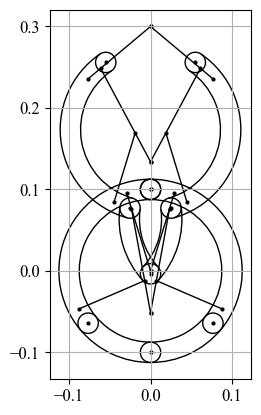

In [45]:
if __name__ == '__main__':
    file_name = 'plot_leg_example'
    
    plot_leg = PlotLeg()  # rad
    ax = plot_leg.plot_by_angle()
    ax = plot_leg.plot_by_angle(np.deg2rad(130), np.deg2rad(0), [0., 0.3], ax=ax)
    # ax = plot_leg.plot_by_rim([0.2, 0.0], [0.1, 0.3], rim='G', ax=ax)
    # ax = plot_leg.plot_by_rim([0.6, 0.1], [0.5, 0.2], rim='lower', ax=ax)
    # ax = plot_leg.plot_by_rim([0.3, 0.1], [0.4, 0.2], rim='lower', ax=ax)
    # plot_leg.setting(mark_size=10, line_width=3, color='red')
    # ax = plot_leg.plot_by_rim([0.8, 0.0], [0.9, 0.12], rim='upper', ax=ax)
    # ax = plot_leg.plot_by_rim([1.0, 0.0], [0.9, 0.12], rim='upper', ax=ax)
    ax.grid()
    
    plt.savefig(file_name + '.png')
    
    plt.show()
    plt.close()

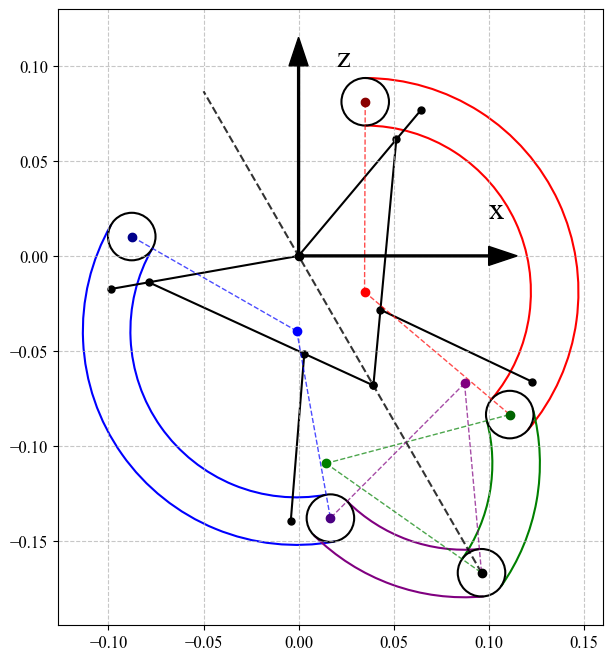

In [39]:
def plot_leg_with_key_points():
    # Set font to Times New Roman
    plt.rcParams.update({
        'font.family': 'Times New Roman',
        'font.size': 12,
        'mathtext.fontset': 'stix'  # This helps with math rendering in Times New Roman style
    })
    
    file_name = 'leg'
    plot_leg = PlotLeg()  # rad
    
    # Create a color dictionary for different parts
    arc_colors = {
        'upper_rim_r': 'red',
        'upper_rim_l': 'blue',
        'lower_rim_r': 'green',
        'lower_rim_l': 'purple',
        'joints': 'black',
        'bars': 'black'
    }
    
    # Set larger markers for better visibility of key points
    plot_leg.setting(mark_size=5, line_width=1.5)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot the leg with a specific angle
    theta = np.deg2rad(70)
    beta = np.deg2rad(30)
    O = np.array([0, 0])
    
    # Forward kinematics and shape generation
    plot_leg.forward(theta, beta, vector=False)
    plot_leg.leg_shape.get_shape(O)
    
    # Add each leg part to the plot with custom colors
    for key, value in plot_leg.leg_shape.__dict__.items():
        if "rim" in key:
            # Set color based on rim type
            rim_color = arc_colors.get(key, 'black')
            value.arc[0].set_color(rim_color)
            value.arc[1].set_color(rim_color)
            ax.add_patch(value.arc[0])
            ax.add_patch(value.arc[1])
            if plot_leg.leg_shape.link_alpha > 0:
                value.arc_fill.set_facecolor((*plt.cm.colors.to_rgb(rim_color), 0.2))
                ax.add_patch(value.arc_fill)
        elif "joint" in key:
            value.set_edgecolor(arc_colors['joints'])
            ax.add_patch(value)
        elif "bar" in key:
            value.set_color(arc_colors['bars'])
            ax.add_line(value)
    
    # Add joint points with proper color
    plot_leg.joint_points = [ax.plot([], [], marker='o', color=arc_colors['joints'], 
                               markersize=5, zorder=plot_leg.leg_shape.zorder+0.00001)[0] 
                           for _ in range(5)]
    
    for i, circle in enumerate([plot_leg.leg_shape.upper_joint_r, plot_leg.leg_shape.upper_joint_l, 
                               plot_leg.leg_shape.lower_joint_r, plot_leg.leg_shape.lower_joint_l, 
                               plot_leg.leg_shape.G_joint]):
        center = circle.get_center()
        plot_leg.joint_points[i].set_data([center[0]], [center[1]])
    
    # Add dashed lines connecting arc centers to joints
    arc_connections = [
        # Format: arc center, joint1, joint2, color
        (plot_leg.U_r, plot_leg.H_r, plot_leg.F_r, arc_colors['upper_rim_r']),
        (plot_leg.U_l, plot_leg.H_l, plot_leg.F_l, arc_colors['upper_rim_l']),
        (plot_leg.L_r, plot_leg.G, plot_leg.F_r, arc_colors['lower_rim_r']),
        (plot_leg.L_l, plot_leg.F_l, plot_leg.G, arc_colors['lower_rim_l'])
    ]
    
    for center, joint1, joint2, color in arc_connections:
        # Line from center to joint1
        ax.plot([center.real, joint1.real], [center.imag, joint1.imag], 
                linestyle='--', color=color, linewidth=1, alpha=0.7, zorder=4)
        
        # Line from center to joint2
        ax.plot([center.real, joint2.real], [center.imag, joint2.imag], 
                linestyle='--', color=color, linewidth=1, alpha=0.7, zorder=4)
    
    # Plot all the key points
    key_points = [
        ('H_r', [plot_leg.H_r.real, plot_leg.H_r.imag], 'darkred'),
        ('H_l', [plot_leg.H_l.real, plot_leg.H_l.imag], 'darkblue'),
        ('F_r', [plot_leg.F_r.real, plot_leg.F_r.imag], 'darkgreen'),
        ('F_l', [plot_leg.F_l.real, plot_leg.F_l.imag], 'indigo'),
        ('G', [plot_leg.G.real, plot_leg.G.imag], 'black'),
        ('U_r', [plot_leg.U_r.real, plot_leg.U_r.imag], 'red'),
        ('U_l', [plot_leg.U_l.real, plot_leg.U_l.imag], 'blue'),
        ('L_r', [plot_leg.L_r.real, plot_leg.L_r.imag], 'green'),
        ('L_l', [plot_leg.L_l.real, plot_leg.L_l.imag], 'purple'),
        ('O', [0, 0], 'black'),
        # ('B_r', [plot_leg.B_r.real, plot_leg.B_r.imag], 'black'),
        # ('B_l', [plot_leg.B_l.real, plot_leg.B_l.imag], 'black'),
        # ('A_r', [plot_leg.A_r.real, plot_leg.A_r.imag], 'black'),
        # ('A_l', [plot_leg.A_l.real, plot_leg.A_l.imag], 'black'),
        # ('E', [plot_leg.E.real, plot_leg.E.imag], 'black'),
        # ('C_r', [plot_leg.C_r.real, plot_leg.C_r.imag], 'black'),
        # ('C_l', [plot_leg.C_l.real, plot_leg.C_l.imag], 'black'),
        # ('D_r', [plot_leg.D_r.real, plot_leg.D_r.imag], 'black'),
        # ('D_l', [plot_leg.D_l.real, plot_leg.D_l.imag], 'black')
    ]
    
    # Plot all key points and add labels
    for name, pos, color in key_points:
        ax.plot(pos[0], pos[1], 'o', markersize=6, color=color, zorder=5)
        # ax.text(pos[0]+0.02, pos[1]+0.02, name, fontsize=10, color=color, 
        #         fontfamily='Times New Roman', zorder=6)
    
    # Add coordinate axes
    arrow_length = 0.1
    arrow_width = 0.01
    # X-axis arrow (pointing right)
    ax.arrow(0, 0, arrow_length, 0, head_width=arrow_width, head_length=arrow_width*1.5, 
             fc='black', ec='black', zorder=6)
    ax.text(arrow_length, 0.02, 'x', fontsize=22, fontfamily='Times New Roman', zorder=6)
    
    # Z-axis arrow (pointing up)
    ax.arrow(0, 0, 0, arrow_length, head_width=arrow_width, head_length=arrow_width*1.5, 
             fc='black', ec='black', zorder=6)
    ax.text(0.02, arrow_length, 'z', fontsize=22, fontfamily='Times New Roman', zorder=6)
    
    # Add dashed line from G to O and extend beyond O
    G_point = np.array([plot_leg.G.real, plot_leg.G.imag])
    O_point = np.array([0, 0])
    
    # Calculate the direction vector from G to O
    direction = O_point - G_point
    direction_normalized = direction / np.linalg.norm(direction)
    
    # Find a point beyond O in the same direction
    extension_length = 0.1  # Length of extension beyond O
    extension_point = O_point + direction_normalized * extension_length
    
    # Draw the dashed line from G through O and beyond
    ax.plot([G_point[0], extension_point[0]], [G_point[1], extension_point[1]], 
            linestyle='--', color='black', linewidth=1.5, alpha=0.8, zorder=3)
    
    # Create a legend for the arc colors
    import matplotlib.patches as mpatches
    legend_elements = [
        mpatches.Patch(color=arc_colors['upper_rim_r'], label='Upper Rim Right'),
        mpatches.Patch(color=arc_colors['upper_rim_l'], label='Upper Rim Left'),
        mpatches.Patch(color=arc_colors['lower_rim_r'], label='Lower Rim Right'),
        mpatches.Patch(color=arc_colors['lower_rim_l'], label='Lower Rim Left')
    ]
    
    # Add the legend
    # ax.legend(handles=legend_elements, loc='upper right', framealpha=0.9)
    
    # Set grid and limits
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_aspect('equal')
    
    # Save the figure with high resolution
    plt.savefig(file_name + '.png', dpi=1000, bbox_inches='tight')
    plt.show()
    
# Run the function to display the key points
plot_leg_with_key_points()

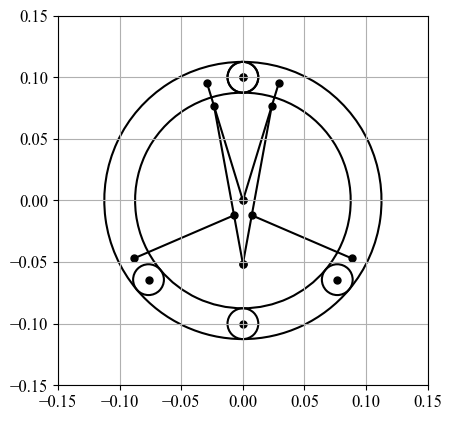

In [51]:
file_name = 'leg_alpha'

plot_leg = PlotLeg()  # rad
plot_leg.setting(mark_size=5, line_width=1.5)
ax = plot_leg.plot_by_angle(np.deg2rad(17), np.deg2rad(0))

ax.set_xlim(-0.15, 0.15)
ax.set_ylim(-0.15, 0.15)

ax.grid()

plt.savefig(file_name + '.png', dpi=1000, bbox_inches='tight')

plt.show()